# Machine Learning in Python

In [1]:
%matplotlib inline
import seaborn as sns

In [2]:
sns.set_context('notebook', font_scale=1.5)

## Illustration

[An image classification example](http://rapid-235.vm.duke.edu:5000)

- Python-powered
    - `opencv` and `scikit-image` for feature extraction
    - `keras` for feature augmentation
    - `scikit-learn` for classification
    - `flask` for web application
    - plus some JavaScript for interactive web features

## Types of learning
  - Unsupervised (clustering, density estimation)
  - Supervised (classification, regression)
  - Reinforcement (reward and punishment)

## Objective of S/L
  - Predict outcome from features
  - y = outcome or label
  - X = vector of features
  - y = f(X, Θ) + error
  - Loss function = g(y, f(X, Θ))

## Model evaluation
  - In-sample (training) and out-of-sample (test) errors
  - Cross validation
    - Holdout
    - K-fold
    - LOOCV
  - **Note**: Any step which uses label/outcome information must be included in cross-validation pipeline

## S/L training pipeline
  - Raw data
  - Extract features from raw data
  - Normalize/scale features
  - Select features for use in model
  - Model selection/evaluation

## S/L training process in `scikit-learn`

  - Consistent API for `scikit-learn` classes
    - `fit`
    - `transform`
    - `predict`
    - `fit_transform` for transformations
    - `fit_predict` for clustering
    - `score` for classification and regression
    - `get_params`
    - `set_params`
  - [Feature extraction]((http://scikit-learn.org/stable/modules/feature_extraction.html))
    - Domain knowledge useful
    - Consider augmenting with external data sources
    - More specialized tools
      - [From natural language](http://www.nltk.org)
      - [From images](http://scikit-image.org)
      - [From images/video](http://opencv.org)
      - [Image feature augmentation](https://keras.io/preprocessing/image/)
      - [From audio](https://github.com/tyiannak/pyAudioAnalysis)
  - [Normalize/scale features](http://scikit-learn.org/stable/modules/preprocessing.html)
      - Necessary for methods based on measures of distance
      - Most commonly
      - **Note**: Must apply same scaling to training and test data
  - [Feature selection](http://scikit-learn.org/dev/modules/feature_selection.html)
    - **Note**: Include feature selection in a pipeline
  - [Model selection/evaluation](http://scikit-learn.org/stable/model_selection.html)
  

## Example

This example is only meant to show the mechanics of using `scikit-learn`. 

In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [4]:
import pandas as pd

###  Get data

In [5]:
iris = pd.read_csv('iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


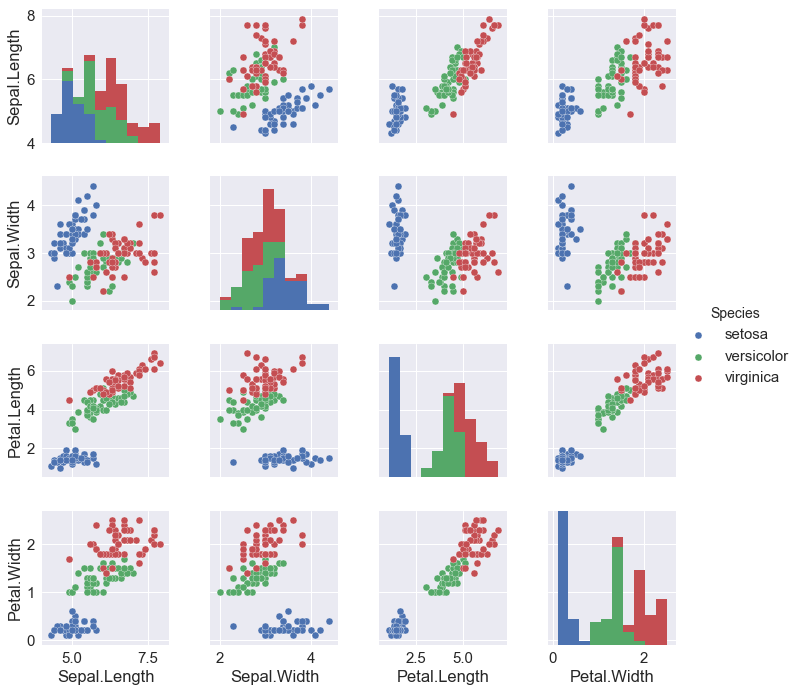

In [6]:
sns.pairplot(iris, hue='Species')
pass

### Feature extraction

#### Split labels and features as plain `numpy`  arrays

In [7]:
X = iris.iloc[:, :4].values
y = iris.iloc[:, 4].astype('category').cat.codes.values

In [8]:
X[:3]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2]])

In [9]:
y[:3]

array([0, 0, 0], dtype=int8)

#### Generate polynomial (interaction) features 

In [10]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [11]:
X_poly[:3]

array([[  1.  ,   5.1 ,   3.5 ,   1.4 ,   0.2 ,  26.01,  17.85,   7.14,
          1.02,  12.25,   4.9 ,   0.7 ,   1.96,   0.28,   0.04],
       [  1.  ,   4.9 ,   3.  ,   1.4 ,   0.2 ,  24.01,  14.7 ,   6.86,
          0.98,   9.  ,   4.2 ,   0.6 ,   1.96,   0.28,   0.04],
       [  1.  ,   4.7 ,   3.2 ,   1.3 ,   0.2 ,  22.09,  15.04,   6.11,
          0.94,  10.24,   4.16,   0.64,   1.69,   0.26,   0.04]])

#### Scale features to have zero mean and unit standard deviation

In [12]:
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [13]:
X_poly_scaled[:3]

array([[ 0.        , -0.90068117,  1.01900435, -1.34022653, -1.3154443 ,
        -0.89149856,  0.00809798, -1.22820826, -1.2360241 ,  0.99432893,
        -1.19958551, -1.22446298, -1.21241227, -1.17404107, -1.08301943],
       [ 0.        , -1.14301691, -0.13197948, -1.34022653, -1.3154443 ,
        -1.09375179, -0.9320241 , -1.24958824, -1.24362931, -0.19637447,
        -1.33368163, -1.26748798, -1.21241227, -1.17404107, -1.08301943],
       [ 0.        , -1.38535265,  0.32841405, -1.39706395, -1.3154443 ,
        -1.2879149 , -0.83055061, -1.30685602, -1.25123452,  0.25792467,
        -1.34134426, -1.25027798, -1.23386659, -1.17829941, -1.08301943]])

#### Select "useful" features

In [14]:
selector = VarianceThreshold(threshold=0.1)
X_new = selector.fit_transform(X_poly_scaled)

In [15]:
X_poly_scaled.shape, X_new.shape

((150, 15), (150, 14))

#### Split into training and test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=1)

In [17]:
X_train[:3]

array([[ 0.79566902, -0.59237301,  0.47857113,  0.3957741 ,  0.75079772,
         0.11255599,  0.50967823,  0.42381301, -0.62136399,  0.32911017,
         0.28141222,  0.31322765,  0.23547252,  0.12853843],
       [ 1.03800476, -1.28296331,  1.16062026,  0.79067065,  1.01777199,
        -0.32019862,  1.19383741,  0.86301389, -1.20389273,  0.63944689,
         0.41048724,  1.3048936 ,  0.98920032,  0.67127249],
       [ 1.15917263, -0.13197948,  0.99010798,  1.18556721,  1.15429293,
         0.76914919,  1.08235611,  1.28510306, -0.19637447,  1.02257864,
         1.18493734,  1.0355228 ,  1.2255387 ,  1.31268548]])

In [18]:
y_train[:3]

array([1, 2, 2], dtype=int8)

In [19]:
X_test[:3]

array([[-0.05250608,  2.16998818, -1.45390138, -1.3154443 , -0.11990246,
         1.60481327, -1.24195253, -1.20940587,  2.36821746, -1.2187421 ,
        -1.18143797, -1.25373169, -1.18255776, -1.08301943],
       [-0.90068117, -1.28296331, -0.4308277 , -0.13075464, -0.89149856,
        -1.51400444, -0.60513472, -0.36332624, -1.20389273, -0.70151424,
        -0.34245036, -0.65301097, -0.53103034, -0.44160644],
       [ 0.91683689, -0.13197948,  0.36489628,  0.26414192,  0.88327359,
         0.59007832,  0.44401116,  0.32684658, -0.19637447,  0.39041125,
         0.28141222,  0.17019891,  0.0779136 , -0.03044427]])

In [20]:
y_test[:3]

array([0, 1, 1], dtype=int8)

#### Train an estimator

In [21]:
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
clf = RidgeClassifierCV(alphas=alphas, cv=5)

In [22]:
clf.fit(X_train, y_train)

RidgeClassifierCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
         class_weight=None, cv=5, fit_intercept=True, normalize=False,
         scoring=None)

#### Evaluate estimator

In [23]:
y_pred = clf.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00        16
          2       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        38



#### Putting it all together in a pipeline

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
pipe = Pipeline([
    ('polynomaial_features', PolynomialFeatures(2)),
    ('standard_scalar', StandardScaler()),
    ('feature_selection', VarianceThreshold(threshold=0.1)),
    ('classification', clf)
])

In [27]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00        16
          2       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        38



#### Alternative pipeline

In [28]:
params = {'n_estimators': [5, 10, 25], 'max_depth': [1, 3, None]}
rf = RandomForestClassifier()
clf2 = GridSearchCV(rf, params, cv=5, n_jobs=-1)

In [29]:
pipe2 = Pipeline([
    ('polynomaial_features', PolynomialFeatures(2)),
    ('feature_selection', VarianceThreshold(threshold=0.1)),
    ('classification', clf2)
])

In [30]:
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.94      0.97        16
          2       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38



#### Getting detailed information from pipeline

In [31]:
classifier = pipe2.named_steps['classification']
classifier.best_params_

{'max_depth': 3, 'n_estimators': 25}